In [1]:
import numpy as np
import pandas as pd

filename='data2\\100K OHM.CSV'
with open(filename) as f:
     print(f.read())

!Keysight Technologies,E4990A,MY54303088,A.03.06
!Date: Mon Jul 10 16:17:44 2023

BEGIN CH1_DATA
Frequency(Hz), |Z|(Ohm)-data, theta-z(deg)-data
+2.00000000000e+001, +9.98658159537e+004, +2.18384072111e-002
+2.16230000000e+001, +9.98660267176e+004, +5.42950643026e-003
+2.33780000000e+001, +9.98869957345e+004, +5.83903371195e-003
+2.52760000000e+001, +9.98729580999e+004, +8.97505393537e-003
+2.73270000000e+001, +9.98775342147e+004, +1.11821743560e-002
+2.95450000000e+001, +9.98772373049e+004, +1.07871837786e-002
+3.19430000000e+001, +9.98516749654e+004, +6.51314166948e-003
+3.45350000000e+001, +9.98686264601e+004, +4.14298745957e-003
+3.73380000000e+001, +9.98646662309e+004, +1.28715411896e-002
+4.03690000000e+001, +9.98656913763e+004, +5.70053930933e-003
+4.36450000000e+001, +9.98555747604e+004, +8.48111595855e-003
+4.71880000000e+001, +9.98628789793e+004, +1.07215787605e-002
+5.10170000000e+001, +9.98632589671e+004, +4.64490017244e-003
+5.51580000000e+001, +9.98626501499e+004, +4.9759

In [2]:
df = pd.read_csv(filename,skiprows=4,skipfooter=1)
print(df)

     Frequency(Hz)   |Z|(Ohm)-data   theta-z(deg)-data
0     2.000000e+01    99865.815954            0.021838
1     2.162300e+01    99866.026718            0.005430
2     2.337800e+01    99886.995735            0.005839
3     2.527600e+01    99872.958100            0.008975
4     2.732700e+01    99877.534215            0.011182
..             ...             ...                 ...
196   8.782501e+07     3435.812777          -86.140082
197   9.495306e+07     3154.005375          -86.200713
198   1.026596e+08     2895.319290          -86.453711
199   1.109917e+08     2643.261738          -86.584523
200   1.200000e+08     2405.322320          -86.778327

[201 rows x 3 columns]


C:\Users\tom2r\AppData\Local\Temp\ipykernel_18244\2953551405.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename,skiprows=4,skipfooter=1)


In [3]:
aZt = df.values
freq_array = np.array(aZt[:,0])
Zabs_array = np.array(aZt[:,1])
Theta_array = np.array(aZt[:,2])

<Figure size 640x480 with 0 Axes>

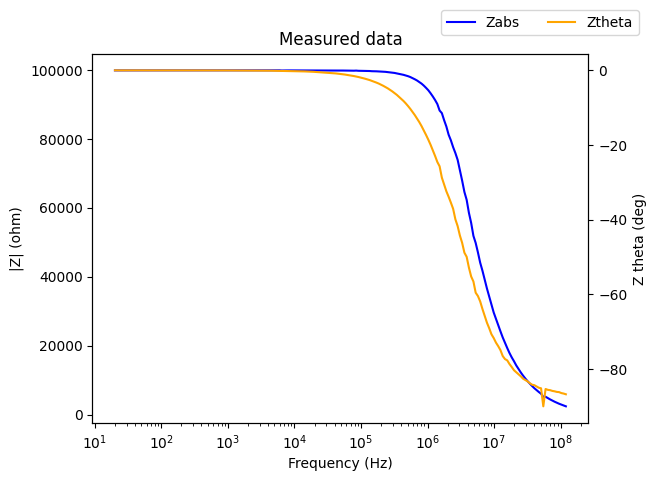

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (ohm)')
ax2 = ax1.twinx()
ax2.set_ylabel('Z theta (deg)')
ax1.plot(freq_array,Zabs_array,color='blue',label="Zabs")
ax2.plot(freq_array,Theta_array,color='orange',label="Ztheta")
fig.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1,ncol=2)
plt.title('Measured data')
plt.xscale('log')
plt.show()

In [5]:
import cmath
import math
# |Z|と偏角のデータから、実部・虚部に変換する
Zcomp_array = [cmath.rect(Zabs, theta*math.pi/180.0) for Zabs, theta in zip(Zabs_array, Theta_array)]

In [6]:
Zcomp_array=np.array(Zcomp_array)

In [7]:
from impedance import preprocessing
# 第 1 象限にインピーダンス データのみを保持する
frequencies, Z = preprocessing.ignoreBelowX(freq_array, Zcomp_array)

In [8]:
from impedance.models.circuits import CustomCircuit

initial_guess = [10000, 50, 0.001,0.00001]
circuit = CustomCircuit('R0-p(R1,C1)-L1', initial_guess=initial_guess)

In [9]:
#circuit.fit(frequencies, Z,global_opt=True)
circuit.fit(frequencies, Z)

print(circuit)


Circuit string: R0-p(R1,C1)-L1
Fit: True

Initial guesses:
     R0 = 1.00e+04 [Ohm]
     R1 = 5.00e+01 [Ohm]
     C1 = 1.00e-03 [F]
     L1 = 1.00e-05 [H]

Fit parameters:
     R0 = 4.41e+04  (+/- 3.66e+03) [Ohm]
     R1 = 5.30e+04  (+/- 5.27e+02) [Ohm]
     C1 = 3.18e-13  (+/- 1.05e-09) [F]
     L1 = 1.60e-31  (+/- 1.13e-05) [H]



In [10]:
Z_fit = circuit.predict(frequencies)

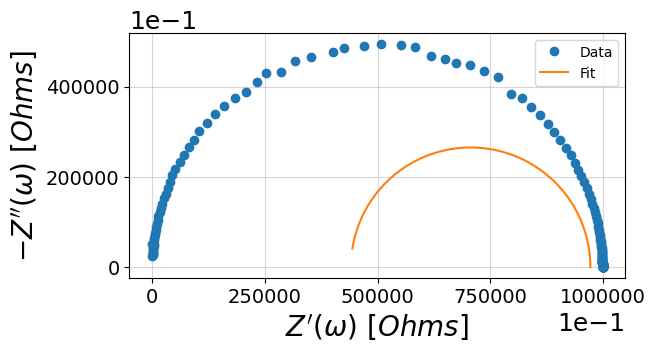

In [11]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()

In [12]:
circuit.plot(f_data=frequencies, Z_data=Z)

C:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
C:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

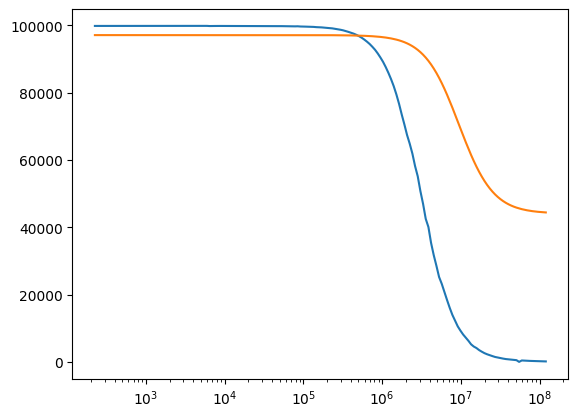

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(frequencies,Z.real)
plt.plot(frequencies,Z_fit.real)
plt.xscale('log')
plt.show()

In [14]:
from impedance.models.circuits.fitting import rmse

model_rmse = rmse(Z, Z_fit)
print(model_rmse)

31032.440966275073


C:\Users\tom2r\.conda\envs\impedance-analysis\Lib\site-packages\impedance\models\circuits\elements.py:170: RuntimeWarning: overflow encountered in tanh
  Z = Z0 / (np.sqrt(1j * omega * tau) * np.tanh(np.sqrt(1j * omega * tau)))


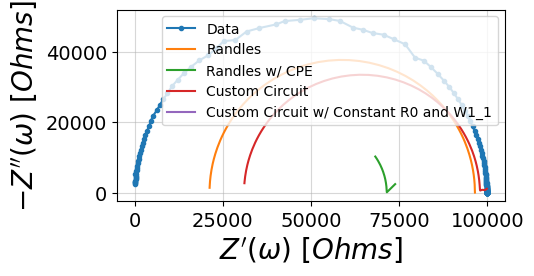


Name: Randles
Circuit string: R0-p(R1-Wo1,C1)
Fit: True

Initial guesses:
     R0 = 1.00e-02 [Ohm]
     R1 = 5.00e-03 [Ohm]
  Wo1_0 = 1.00e-03 [Ohm]
  Wo1_1 = 2.00e+02 [sec]
     C1 = 1.00e-01 [F]

Fit parameters:
     R0 = 2.12e+04  (+/- 1.09e+03) [Ohm]
     R1 = 7.53e+04  (+/- 1.11e+02) [Ohm]
  Wo1_0 = 6.44e+04  (+/- 9.69e-03) [Ohm]
  Wo1_1 = 2.75e+04  (+/- 1.14e-02) [sec]
     C1 = 9.68e-13  (+/- 2.47e-10) [F]


Name: Randles w/ CPE
Circuit string: R0-p(R1-Wo1,CPE1)
Fit: True

Initial guesses:
     R0 = 1.00e-02 [Ohm]
     R1 = 5.00e-03 [Ohm]
  Wo1_0 = 1.00e-03 [Ohm]
  Wo1_1 = 2.00e+02 [sec]
  CPE1_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []

Fit parameters:
     R0 = 3.58e+04  (+/- 2.70e-04) [Ohm]
     R1 = 3.57e+04  (+/- 2.70e-04) [Ohm]
  Wo1_0 = 7.75e+04  (+/- 2.03e-05) [Ohm]
  Wo1_1 = 3.69e-01  (+/- 2.13e+00) [sec]
  CPE1_0 = 1.18e-14  (+/- 1.07e-09) [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00  (+/- 5.61e-02) []


Circuit string: R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1
Fit: True

Initial 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist
from impedance.models.circuits import Randles, CustomCircuit

randles = Randles(initial_guess=[.01, .005, .001, 200, .1])
randlesCPE = Randles(initial_guess=[.01, .005, .001, 200, .1, .9], CPE=True)
customCircuit = CustomCircuit(initial_guess=[.01, .005, .1, .005, .1, .001, 200],
                              circuit='R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1')
customConstantCircuit = CustomCircuit(initial_guess=[None, .005, .1, .005, .1, .001, None],
                                      constants={'R_0': 0.02, 'Wo_1_1': 200},
                                      circuit='R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1')
randles.fit(frequencies, Z)
randlesCPE.fit(frequencies, Z)
customCircuit.fit(frequencies, Z)
customConstantCircuit.fit(frequencies, Z)

randles_fit = randles.predict(frequencies)
randlesCPE_fit = randlesCPE.predict(frequencies)
customCircuit_fit = customCircuit.predict(frequencies)
customConstantCircuit_fit = customConstantCircuit.predict(frequencies)

fig, ax = plt.subplots(figsize=(5,5))

plot_nyquist(Z, ax=ax)
plot_nyquist(randles_fit, fmt='-', ax=ax)
plot_nyquist(randlesCPE_fit, fmt='-', ax=ax)
plot_nyquist(customCircuit_fit, fmt='-', ax=ax)
plot_nyquist(customConstantCircuit_fit, fmt='-', ax=ax)

ax.legend(['Data', 'Randles', 'Randles w/ CPE', 'Custom Circuit', 'Custom Circuit w/ Constant R0 and W1_1'])
plt.show()
print(randles)
print(randlesCPE)
print(customCircuit)
print(customConstantCircuit)